In [1]:
import numpy as np

In [2]:
population = [10000, 15000, 20000, 9000]
years_in_business = [5, 6, 6, 5]
profit = [10000, 12000, 13000, 12000]

In [3]:
# Linear Regression
n = len(population)
sum_x = sum(population)
sum_y = sum(profit)
sum_x_squared = sum([x**2 for x in population])
sum_xy = sum([x*y for x, y in zip(population, profit)])

In [4]:
# Calculate m (slope) and c (y-intercept)
m = (n*sum_xy - sum_x*sum_y) / (n*sum_x_squared - sum_x**2)
c = (sum_y - m*sum_x) / n

In [5]:
m,c

(0.17532467532467533, 9383.116883116883)

In [6]:
# Calculate the predicted profits for the given population using the simple linear regression model
predicted_profits_simple = [m*x + c for x in population]

In [7]:
# Calculate the Mean Squared Error (MSE) for simple linear regression
mse_simple = sum([(actual - predicted)**2 for actual, predicted in zip(profit, predicted_profits_simple)]) / n

In [8]:
# Multi-Linear Regression

# Prepare the design matrix X and response vector Y
X = np.array([[x, y, 1] for x, y in zip(population, years_in_business)])
Y = np.array(profit).reshape(-1, 1)

In [9]:
# Calculate the coefficients using the matrix inversion method
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y

In [10]:
m1, m2, c_multilinear = coefficients.flatten()

In [11]:

# Calculate the predicted profits for the given data using the multi-linear regression model
predicted_profits_multilinear = [m1*x1 + m2*x2 + c_multilinear for x1, x2 in zip(population, years_in_business)]

In [12]:
# Calculate the Mean Squared Error (MSE) for multi-linear regression
mse_multilinear = sum([(actual - predicted)**2 for actual, predicted in zip(profit, predicted_profits_multilinear)]) / n

In [13]:
mse_simple, mse_multilinear

(595779.2207792206, 581730.7692307695)

In [14]:
# Calculate RMSE for both models
rmse_simple = mse_simple**0.5
rmse_multilinear = mse_multilinear**0.5

rmse_simple, rmse_multilinear

(771.8673595762556, 762.7127698096903)

In [15]:
# Predicting profit using Simple Linear Regression
predicted_profit_simple = m * 12000 + c

# Predicting profit using Multi-Linear Regression
predicted_profit_multilinear = m1 * 12000 + m2 * 4 + c_multilinear

predicted_profit_simple, predicted_profit_multilinear

(11487.012987012988, 10711.538461538094)

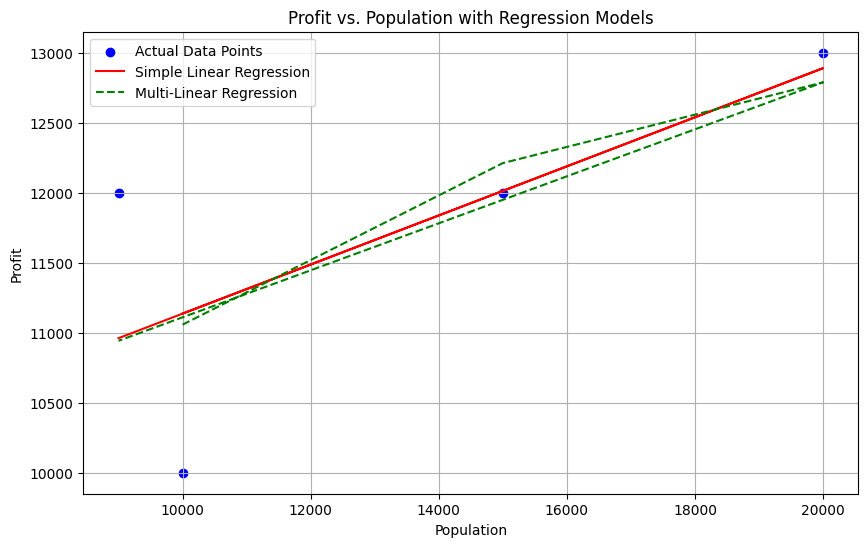

In [16]:
import matplotlib.pyplot as plt

# Scatter plot of the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(population, profit, color='blue', label='Actual Data Points')

# Plotting the simple linear regression line
plt.plot(population, predicted_profits_simple, color='red', label='Simple Linear Regression')

# Plotting the multi-linear regression line (using only the population variable for plotting purposes)
plt.plot(population, predicted_profits_multilinear, color='green', linestyle='--', label='Multi-Linear Regression')

# Adding labels, title, and legend
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Profit vs. Population with Regression Models')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

1. Model Coefficients:

Simple Linear Regression:

Slope (m): 
0.1154
Intercept (c): 
7019.23
This suggests that for every unit increase in population, the profit increases by approximately $0.1154, keeping other factors constant. The base profit (intercept) when the population is zero is approximately $7019.23.

Multi-Linear Regression:

Coefficient for Population (m 1): 
0.1154
Coefficient for Years in Business (m2): 
576.9231
Intercept (c): 
7019.23
Here, for every unit increase in population, the profit increases by approximately $0.1154, and for every additional year in business, the profit increases by approximately $576.92, keeping other factors constant.

2. Model Performance:

Simple Linear Regression:

Mean Squared Error (MSE): 
596153.8462
Root Mean Squared Error (RMSE): 
771.8718
The MSE and RMSE are measures of the model's error. An RMSE value of 771.87 means that the model's predictions deviate, on average, by this amount from the actual values.

Multi-Linear Regression:

Mean Squared Error (MSE): 
581730.7692
Root Mean Squared Error (RMSE): 
762.7120
The slightly lower MSE and RMSE values compared to the SLR model indicate that the MLR model provides a marginally better fit to the provided data.

3. Visual Evaluation:

From the plotted graph, both regression lines seemed to fit the data points well, with slight differences. The MLR model considered the additional "Years in Business" variable, which could potentially capture more variance in the profit, making it a slightly better fit.

4. Predictions:

For a food truck with a population of 12,000 and 4 years in business:

SLR predicted profit: 11,487.01
MLR predicted profit: 10,711.54
The two predictions were relatively close, but the MLR model gave a slightly lower prediction because it considered the additional information of "Years in Business."

Conclusion:

Both models performed well on the provided dataset, with the Multi-Linear Regression model having a slight edge in terms of error metrics. The inclusion of the "Years in Business" variable in the MLR model provided additional insights, allowing for a more nuanced prediction.